In [1]:
import pandas as pd
from pathlib import Path
# import numpy as np
#import matplotlib.pyplot as plt
import pandas as pd
# !yes | pip install yfinance
# import yfinance as yf
import warnings
warnings.filterwarnings("ignore")
import requests
import base64
from ezekial import yahooprophet as yfp

# %matplotlib inline

In [2]:
def load_tickers(ticker_path):
    """
    Takes five hundred tickers, which is max calls of yfinance for public ip
    """
    ticker_file_path = Path(ticker_path)
    ticker_df = pd.read_csv(ticker_file_path)
    prophet_ticker_list = ticker_df['Symbol'].head(500).to_list()

    print("First ticker in list: " + prophet_ticker_list[0])
    return prophet_ticker_list

In [3]:
prophet_ticker_list = load_tickers('data/S&P500 tickers.csv')

First ticker in list: AAPL


In [25]:
# for ticker in prophet_ticker_list:
#     print(ticker)

In [29]:
#CREATES A DATAFRAME OF THE CLOSE PRICE OF THE ticker_list STARTING FROM 2018
# for x in range(len(prophet_ticker_list)):
#     print(x)
    # try:
    #     if x == 0:
    #         df = yf.Ticker(prophet_ticker_list[x]).history(start='2018-01-01')['Close'].rename(ticker_list[x])    
    #     else:
    #         df1 = yf.Ticker(ticker_list[x]).history(start='2018-01-01')['Close'].rename(ticker_list[x])
    #         df = pd.concat([df, df1], axis=1)
    # except: print("yfinance api public ip calls reached daily limit.\nConsider using torify command &/or Alpha Vantage API")

In [48]:
yfp_obj = yfp.YahooProphet()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -17.48
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2213.85     0.0298273       237.658           1           1      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2281.22      0.228641       476.601           1           1      245   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     201       2282.42    0.00129215        407.55    2.71e-06       0.001      290  LS failed, Hessian reset 
     299       2307.23     0.0068996        227.24           1           1      414   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     324       2311.81   0.000997407       236.361   6.216e-06       0.001      498  LS failed, Hessian reset 
     381       2316.74    0.00454578       306.575   5.238e-05       0.001      604  LS failed, Hessian reset 

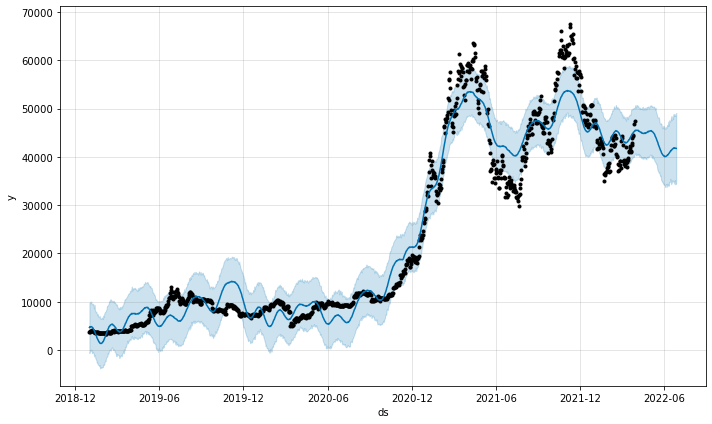

In [49]:
prophet_plot = yfp_obj.plot()

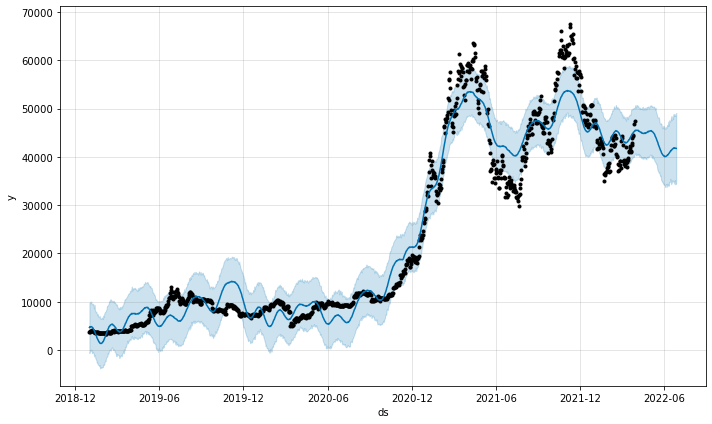

In [50]:
prophet_plot

# Byte Encoding Matplotlib Figure to byte string and decoding it

## Server Side (Put in Function in Ezekial Itself):
Look for more effecient method to rather than saving prior to converting to byte string.

In [51]:
# Have to convert from matplotlib figure to .png
forecast_img_path = Path('images/forecast_temp/forecast.png')
prophet_plot.savefig(forecast_img_path)

In [52]:
# Create the converted image to string
import base64

with open(forecast_img_path, "rb") as image2string:
    converted_string = base64.b64encode(image2string.read())
print(len(converted_string))
# print(converted_string.decode('utf-8'))

# Save converted string to .bin file
# USE POST METHOD ON THE API INSTEAD
forecast_img_path = Path('images/forecast_temp/encoded.bin')
with open(forecast_img_path, "wb") as file:
    file.write(converted_string)

In [54]:
# converted_string

bytes

## Client Side (app side)

In [86]:
import base64
# USE API CALL HERE FIRST 
# MAY NEED TO SAVE FIRST FOR READING IN BINARY MODE & SETTING AS A VAR
forecast_img_path = Path('images/forecast_temp/encoded.bin')
file = open(forecast_img_path, 'rb')
byte = file.read()
file.close()
# Decode string and save as a .png
forecast_decoded_img_path = Path('images/forecast_temp/decoded.png')
decodeit = open(forecast_decoded_img_path, 'wb')
decodeit.write(base64.b64decode((byte)))
decodeit.close()

In [ ]:
#load decoded image into Kivy

## Checking Ezekial Method

In [3]:
yfp_obj = yfp.YahooProphet(prophet_ticker_list[0], '2019-1-1', 90)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -3.50591
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2521.31       0.14254       2276.35           1           1      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        2572.3     0.0120803        256.26       0.678           1      236   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        2588.9    0.00140161       536.075           1           1      355   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     366       2593.63   0.000110521        159.26   1.758e-07       0.001      472  LS failed, Hessian reset 
     399       2595.56    0.00066646       206.927      0.5699      0.5699      514   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     471       2600.54   0.000281555    

Successfully saved AAPL image.


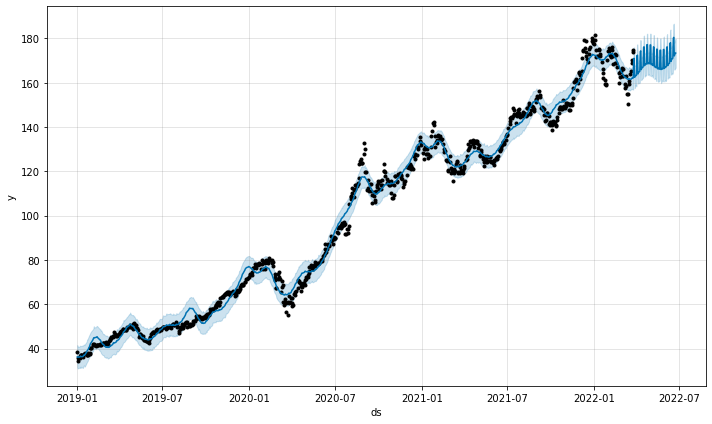

In [4]:
yfp_obj.encode_plot()

In [7]:
yfp_obj.decode_plot()
forecast_decoded_img_path = Path('images/forecast_temp/decoded.png')

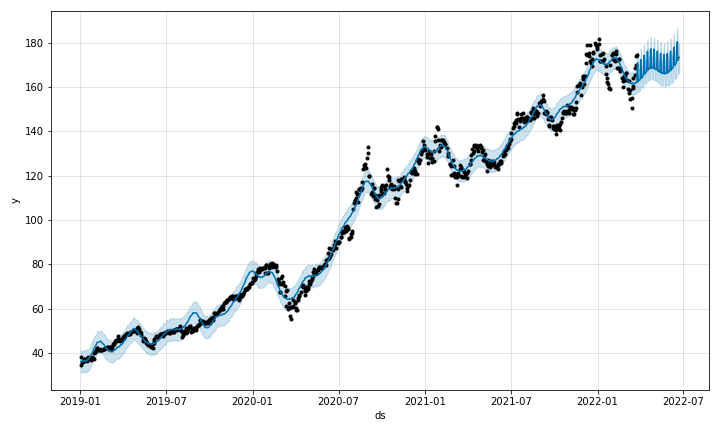

In [8]:
from PIL import Image                                                                                
img = Image.open(forecast_decoded_img_path)
img.show() 

# Make Function to Use Ezekial for the Entire Ticker List and Upload Images with POST to Django Server

```
conda activate forecastappenv
python ~/python_proj/Fintech-Forecast-App/mysite1anage.py runseserver 0.0.0.0:3555
```

### Checking Djanjo Requests

In [1]:
# import requests

In [40]:
# url = 'http://YOUR_IP/ds/'

In [41]:
# response = requests.get(url)
# response_json = response.json()
# response_json

[{'id': 1, 'ticker': '5', 'encoded_string': '1'},
 {'id': 2, 'ticker': 'appl', 'encoded_string': 'asdfasdfasdf'}]

In [24]:
# convert to dictionary
# response_json

[{'id': 1, 'ticker': '5', 'encoded_string': '1'}]

### Checking Django POST

In [12]:
# import requests

# # Have to convert from matplotlib figure to .png
# def make_and_save_first_ticker_plot():
#     prophet_ticker_list = load_tickers('data/S&P500 tickers.csv')
#     yfp_obj = yfp.YahooProphet(prophet_ticker_list[0], '2019-1-1', 90)
#     # forecast_img_path = Path('images/forecast_temp/forecast.png')
#     return yfp_obj.encode_plot()
    
#     # forecast_img_path = Path('images/forecast_temp/encoded.bin')
#     # with open(forecast_img_path, "r") as file:
#     #     encoded_image = str(file.readlines()).replace('[','').replace(']','')

In [124]:
# encoded_image = make_and_save_first_ticker_plot()

In [125]:
# encoded_image[:15]

In [126]:
# len(encoded_image[:15])

In [128]:
# prophet_t_list = load_tickers('data/S&P500 tickers.csv')

# json_post = {
#     "ticker": f"{prophet_t_list[5]}",
#     "encoded_string": f"{encoded_image[:15]}"
# }

# # json_post

In [127]:
# from dotenv import load_dotenv
# import os

# # https://anaconda.org/conda-forge/python-dotenv
# # conda install -c conda-forge python-dotenv -y
# load_dotenv()
# url = os.getenv("DJANGO_SERVER_URL")
# url

In [129]:
# requests.post(url,json_post)

In [130]:
# url += ''
# url

In [131]:
# url[:-1]

In [132]:
# requests.delete(url)

In [133]:
# len(django_get())

# Django SQL DB Methods

```
conda activate forecastappenv
python ~/python_proj/Fintech-Forecast-App/mysite1/manage.py runseserver 0.0.0.0:3555
```

In [1]:
import requests
from dotenv import load_dotenv
import os

def django_get(url):
    response = requests.get(url)
    response_json = response.json()
    return response_json

load_dotenv()
url = os.getenv("DJANGO_SERVER_URL")
django_api_dict = django_get(url)
django_api_dict

[]

In [2]:
import requests
from dotenv import load_dotenv
import os

def clear_django_sql_db():
    """
    Clears the sql db in the django api.
    "DJANGO_SERVER_URL" is provided in .env file.
    """
    
    try:
        load_dotenv()
        url = os.getenv("DJANGO_SERVER_URL")
        
        django_api_items = django_get(url)
        
        if len(django_api_items) != 0:
            for x, index_id in enumerate(django_api_items):
                x += 1
                str_indx = str(index_id['id'])
                
                if x == 1:
                    url += str(str_indx)
                    requests.delete(url)
                    # print(f'entered if block\t{url}')
                else:
                    try:
                        url = url[:-len(str_indx)] + str_indx
                        requests.delete(url)
                        # print(f'entered else block\t{url}')
                    # For when the number of digits change
                    except:
                        url = url[:-len(str_indx)] + str_indx + 1
                        requests.delete(url)                    
                        # print(f'entered else block\t{url}')
            print(f"Django SQL DB cleared:\n\n{django_get()}")
        else:
            print("Django SQL DB Already empty:\n\n{django_get()}")
    except:
        print(f"Django server did not clear:\n\n{django_get()}")

# clear_django_sql_db()

In [13]:
import pandas as pd
from pathlib import Path
# https://anaconda.org/conda-forge/python-dotenv
# conda install -c conda-forge python-dotenv -y
from dotenv import load_dotenv
import os
# import numpy as np
#import matplotlib.pyplot as plt
import pandas as pd
# !yes | pip install yfinance
# import yfinance as yf
import warnings
warnings.filterwarnings("ignore")
import requests
from ezekial import yahooprophet as yfp


# Have to convert from matplotlib figure to .png
def make_and_save_ticker_plot(ticker_path='data/S&P500 tickers.csv', start_date='2019-1-1', forecast_ahead=90, url="http://127.0.0.1:8000/ds"):
    """
    Scrapes yfinance from tickers provided in 'data/S&P500 tickers.csv',
    then uses Ezekial package to generate forecast plots.
    Plots are then encdoded and stored in the Djanog server API, using
    REQUESTS and a POST.
    
    Parameters
    ----------
    ticker_path : str
        Path from function to ticker data.
        Should be a .csv file with a header col named 'Symbol'.
        Selects top 500 tickers, due to yfinance public ip api limits.
        Defaults to data/S&P500 tickers.csv
        
    start_date : str
        YYYY-MM-DD format, this is the start date of the returned df.
        Defaults to 2019-1-1
        
    forecast_ahead : int
        Number of days for FB Prophet to forecast.
        Defaults to 90.
    
    url : str
        URL to send Django API POST's.
        Defaults to "http://127.0.0.1:8000/ds".
    
    See Also
    --------
    yfinance.Ticker() : https://pypi.org/project/yfinance/
    prophet.Prophet() : https://facebook.github.io/prophet/docs/quick_start.html#python-api

    Examples
    --------
    >>> make_and_save_ticker_plot()
    
    >>> 
    
    >>> 
    """
        
    def load_tickers(ticker_path):
        """
        Takes five hundred tickers, which is max calls of yfinance for public ip.
        """
        ticker_file_path = Path(ticker_path)
        ticker_df = pd.read_csv(ticker_file_path)
        prophet_ticker_list = ticker_df['Symbol'].head(500).to_list()
        return prophet_ticker_list

    # return load_tickers('data/S&P500 tickers.csv')
    
    def make_plots(url):
        """
        Makes and encodes the plots and POST's to Django API.
        """
        
        # REMOVE [:3] TO RUN FULL LIST 
        for tick in load_tickers(ticker_path)[:3]:
            try:
                yfp_obj = yfp.YahooProphet(tick, start_date, forecast_ahead)
                
                json_post = {
                    "ticker": f"{tick}",
                    "encoded_string": f"{yfp_obj.encode_plot()}"
                }
                
                print(f"+++ {tick} success!")
                requests.post(url,json_post)
                
            except:
                print(f"\t--- {tick} failed ---")
                print("\n\n\tyfinance API daily limit reached.")
            
    make_plots(url)
    
    # forecast_img_path = Path('images/forecast_temp/encoded.bin')
    # with open(forecast_img_path, "r") as file:
    #     encoded_image = str(file.readlines()).replace('[','').replace(']','')
    
    # encoded_image = make_and_save_ticker_plot()


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -3.53898
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2509.69    0.00801332       1102.07      0.2872           1      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2566.89     0.0013204       524.078      0.4689      0.4689      223   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     297       2585.85   0.000155581        322.42   7.472e-07       0.001      370  LS failed, Hessian reset 
     299       2585.89   0.000237439       131.804           1           1      372   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       2592.61    0.00201075       120.568           1           1      491   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       2598.59    0.00632342    

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -2.86224
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2477.83    0.00633353       519.189           1           1      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2520.69     0.0019024       468.084       0.276       0.276      232   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2535.31    0.00178194        214.72           1           1      346   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       2547.05   0.000115845       229.497      0.4691    0.004691      465   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       2559.89    0.00508597       316.979      0.3435      0.8419      585   
    Iter      log prob        ||dx||      ||grad||       alpha  

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -6.17848
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2412.53     0.0116239       872.047           1           1      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2444.17    0.00467226       307.804       1.561      0.1561      246   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2452.46    0.00467424       549.643      0.8344      0.8344      363   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     375       2456.83   4.28393e-05       77.2499   3.199e-07       0.001      502  LS failed, Hessian reset 
     399       2457.32   3.20571e-05        162.53      0.3117      0.3117      534   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     418       2457.45   0.000714741    

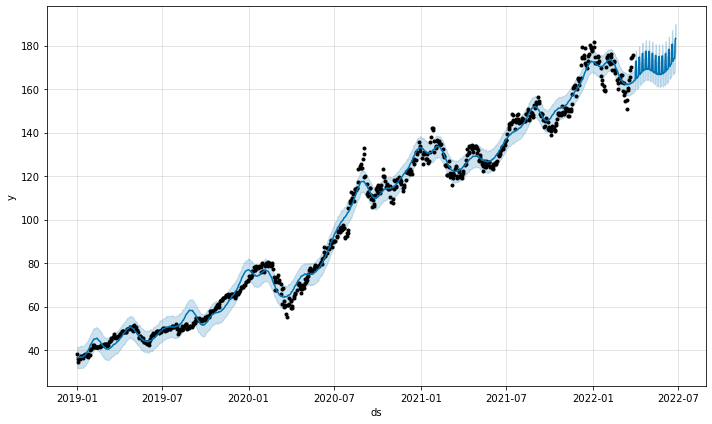

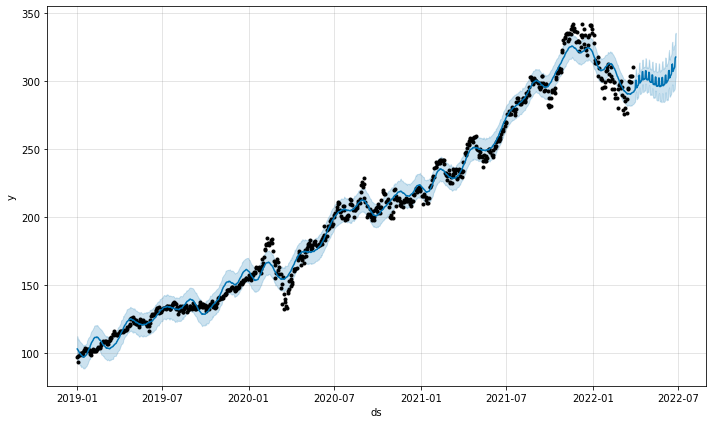

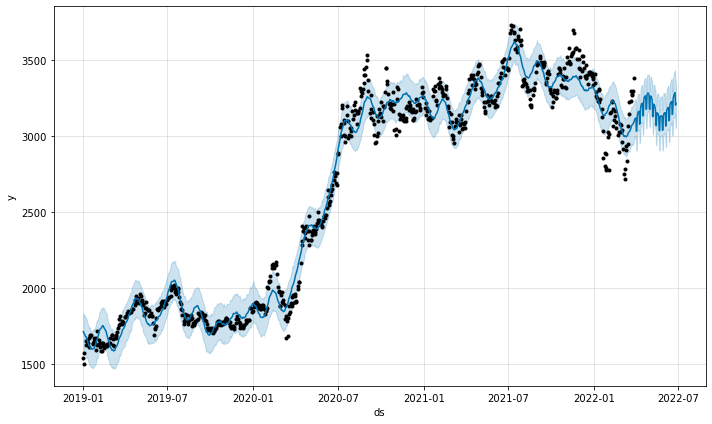

In [14]:
load_dotenv()
url = os.getenv("DJANGO_SERVER_URL")
url

make_and_save_ticker_plot(url=url)

In [15]:
load_dotenv()
url = os.getenv("DJANGO_SERVER_URL")
django_api_dict = django_get(url)
# django_api_dict

In [16]:
# clear_django_sql_db()

# load_dotenv()
# url = os.getenv("DJANGO_SERVER_URL")
# django_api_dict = django_get(url)
# django_api_dict

## Check App Side

In [126]:
import requests
from dotenv import load_dotenv
import os

def django_get(url):
    response = requests.get(url)
    response_json = response.json()
    return response_json

load_dotenv()
url = os.getenv("DJANGO_SERVER_URL")
django_api_dict = django_get(url)

django_api_dict[0].keys()
# django_api_dict

dict_keys(['id', 'ticker', 'encoded_string'])

In [141]:
import base64

def select_ticker(ticker):
    for dictionary in django_api_dict:    
        try:
            if dictionary['ticker'] == ticker:
                encoded_plot = dictionary['encoded_string']
        except: return print("Ticker Not Found in Forecast Database")
        
    # Decode string and save as a .png
    forecast_decoded_img_path = Path('images/forecast_temp/decoded.png')
    decodeit = open(forecast_decoded_img_path, 'wb')
    decodeit.write(base64.b64decode(encoded_plot[2:].encode()))
    decodeit.close()

In [142]:
select_ticker('AAPL')

In [7]:
import requests
from dotenv import load_dotenv
import os
import base64
from pathlib import Path

class save_ticker_image:
    
    def __init__(self, url, img_path, ticker):
        self.url = url
        self.img_path = img_path
        self.ticker = ticker
    
    def django_get(self):
        response = requests.get(self.url)
        response_json = response.json()
        return response_json

    def select_ticker(self):
        django_api_dict = self.django_get()
        for dictionary in django_api_dict:    
            try:
                if dictionary['ticker'] == self.ticker:
                    encoded_plot = dictionary['encoded_string']
            except: return print("Ticker Not Found in Forecast Database")

        # Decode string and save as a .png
        try:
            decodeit = open(self.img_path, 'wb')
            decodeit.write(base64.b64decode(encoded_plot[2:].encode()))
            decodeit.close()
            print("Image Saved Successfully")
        except: return print("Could Not Save Plot Ticker Not Found")


In [6]:
load_dotenv()
url = os.getenv("DJANGO_SERVER_URL")
forecast_decoded_img_path = Path('images/forecast_temp/decoded.png')

save_ticker_image(url=url, img_path=forecast_decoded_img_path, ticker='MSFT').select_ticker()

Image Saved Successfully


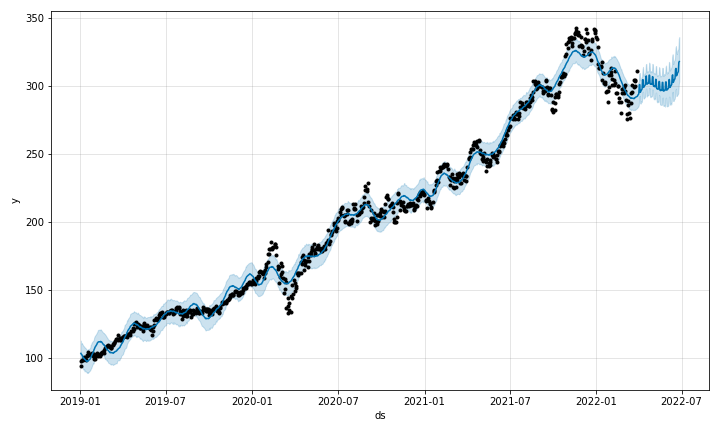

In [158]:
#Check Saved Image
from PIL import Image

forecast_decoded_img_path = Path('images/forecast_temp/decoded.png')

img = Image.open(forecast_decoded_img_path)
img.show() 

In [128]:
for dictionary in django_api_dict:
    # print(dictionary['id'], dictionary['ticker'])
    
    if dictionary['ticker'] == 'AAPL':
        # print(dictionary['encoded_string'])
        encoded_plot = dictionary['encoded_string']

In [129]:
encoded_plot[:22]

"b'iVBORw0KGgoAAAANSUhE"

In [92]:
encoded_plot[2:22]

'iVBORw0KGgoAAAANSUhE'

In [93]:
# bytes(encoded_plot[2:], encoding='utf-8')

encoded_plot1 = encoded_plot[2:].encode()
encoded_plot1[:20]

b'iVBORw0KGgoAAAANSUhE'

In [95]:
# # Save converted string to .bin file
# # USE POST METHOD ON THE API INSTEAD
# forecast_img_path = Path('images/forecast_temp/encoded.bin')
# with open(forecast_img_path, "wb") as file:
#     file.write(encoded_plot1)
#     file.close()

In [96]:
# forecast_img_path = Path('images/forecast_temp/encoded.bin')
# file = open(forecast_img_path, 'rb')
# byte = file.read()
# file.close()

In [98]:
# byte

In [100]:
# encoded_plot1

In [106]:
import base64

# Decode string and save as a .png
forecast_decoded_img_path = Path('images/forecast_temp/decoded.png')
decodeit = open(forecast_decoded_img_path, 'wb')
decodeit.write(base64.b64decode(encoded_plot[2:].encode()))
decodeit.close()


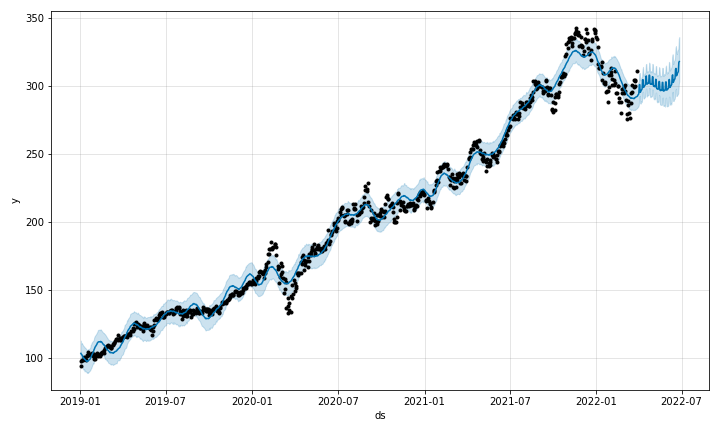

In [108]:
from PIL import Image                                                                                
img = Image.open(forecast_decoded_img_path)
img.show() 